# Mini Project 3

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

The code below provides a visual representation of how the Black-Scholes **call option** price changes with respect to time.

**a)** Use the visualization to interpret how the *rate of change* of the Black-Scholes call option price behaves as time progresses.

**b)** Create a separate graphic to visualize how the *rate of change* of the Black-Scholes call option price depends on the spot price $S(0)$.

**c)** Repeat parts **a** and **b** for **put option** prices.

**d)** Use the space below to record your observations and reflections based on the generated plots.

---

### Observations:

- *Call Option – Time Sensitivity:*   
- *Call Option – Spot Price Sensitivity:*  
- *Put Option – Time Sensitivity:*  
- *Put Option – Spot Price Sensitivity:*  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns
sns.set_style('darkgrid')

def bs_call(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European call option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S0*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)


def bs_put(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European put option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Put option price
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*t)*norm.cdf(-d2)


S0 = 100
K = 110
sigma = .3
t = 1
Spot_prices = np.linspace(1/12, 200, 200)

times = np.linspace(1/12, 5, 70)


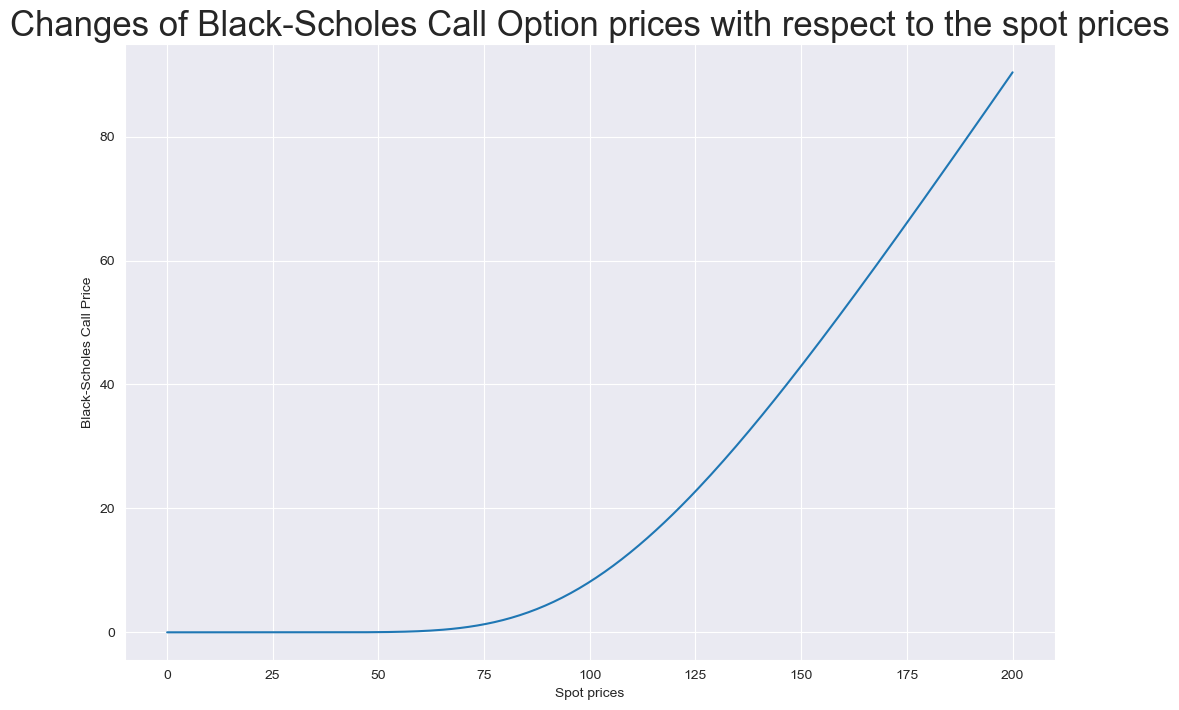

In [2]:
call_prices_spot = [bs_call(Spot_prices[i],K,sigma, t) for i in range(len(Spot_prices))]

plt.figure(figsize = (12,8))
plt.title('Changes of Black-Scholes Call Option prices with respect to the spot prices', size = 25)
plt.plot(Spot_prices, call_prices_spot)
plt.xlabel('Spot prices')
plt.ylabel('Black-Scholes Call Price')
plt.show()

We can see that when spot price is less than $\$60$, Black-Sholes Call price stays almost constant $0$. Intuitively it makes sense, because it is unlikely that cost of the stock will double in a year. We can also see it from the formula 
$$\frac{\partial C_0}{\partial S} = \Phi(d_1),$$
where 
$$d_1 = \frac{\log(S/K) + 0.5\sigma^2 t}{\sigma\sqrt{t}}.$$
As $S\to 0$, $d_1 \to -\infty$ and $\Phi(d_1) \to 0,$ which corresponds to the graphs staying almost constant 0.

On the other side, when the Spot price is much bigger than K, graph looks almost linear with slope close to $1$. Again, this can be seen from the formula for the derivative, since when $S \to \infty$, $d_1 \to \infty$ and $\Phi(d_1) \to 1$, so the price grows linearly.

Intuitively we can say, that when the $S >> K$, it is reasonable to assume that the price won't change drastically and it is very likely that profit from buying such stock will be ~ $S-K$.

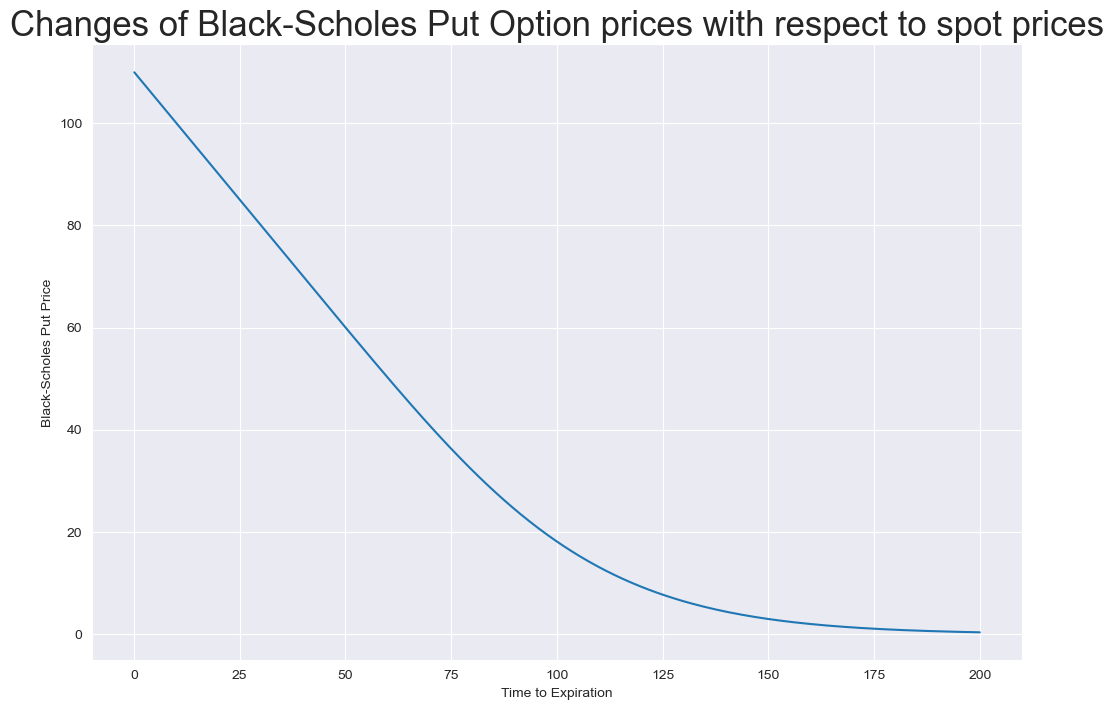

In [8]:
put_prices_spot = [bs_put(Spot_prices[i],K,sigma, t) for i in range(len(Spot_prices))]

plt.figure(figsize = (12,8))
plt.title('Changes of Black-Scholes Put Option prices with respect to spot prices', size = 25)
plt.plot(Spot_prices, put_prices_spot)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Put Price')
plt.show()

Here we see almost the same picture as for the call option, only inverted in time (in the sense that is starts almost linearly and ends in being constant). This is obviously seen from the put-call parity relation:

$$C_0 - P_0 = S -Ke^{-rt},$$
and 
$$\frac{\partial P_0}{\partial S} = \Phi(d_1) - 1$$.

In the put-call parity $Ke^{-rt}$ doesn't depend on S, so basically $P_0 \approx C_0 - S$ and constant region becomes linear one with slope $\approx -1$; linear region becomes almost constantly $0$. 
The same can be seen from the fromula for the derivative.

Let's compare the 

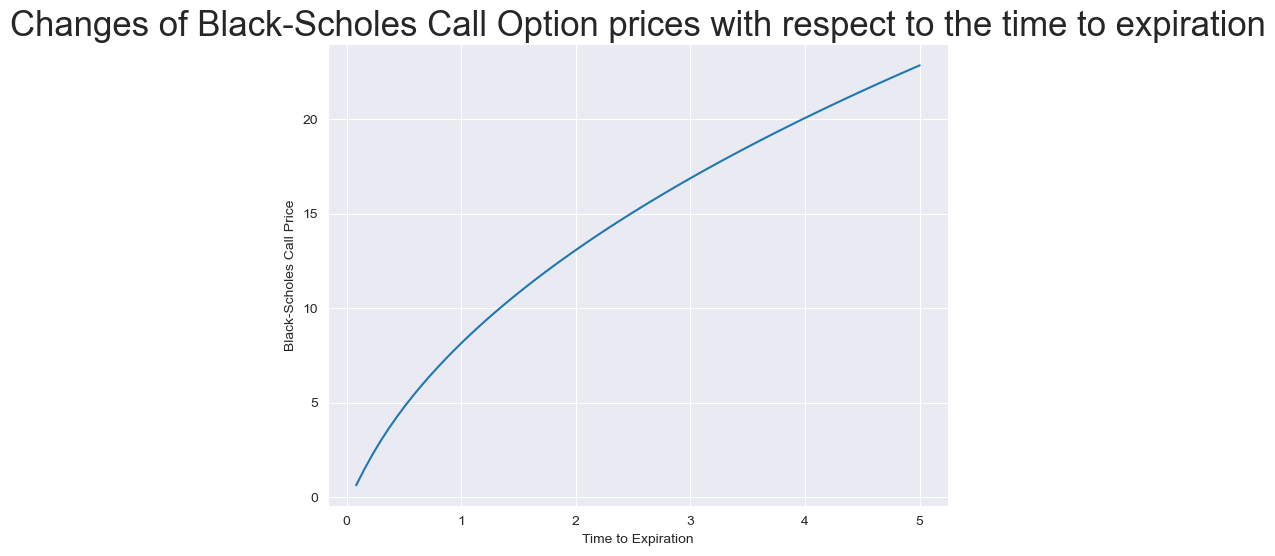

In [4]:
call_prices_time = [bs_call(S0,K,sigma, t = times[i]) for i in range(len(times))]


plt.figure(figsize = (8,6))
plt.title('Changes of Black-Scholes Call Option prices with respect to the time to expiration', size = 25)
plt.plot(times, call_prices_time)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Call Price')
plt.show()


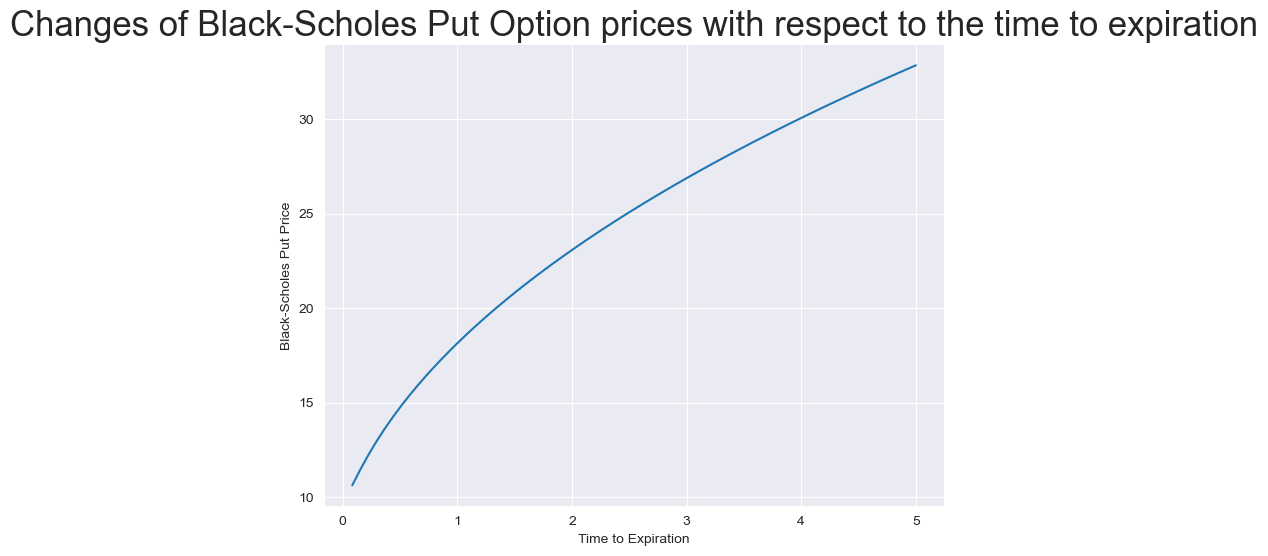

In [5]:
put_prices_time = [bs_put(S0,K,sigma, t = times[i]) for i in range(len(times))]


plt.figure(figsize = (8,6))
plt.title('Changes of Black-Scholes Put Option prices with respect to the time to expiration', size = 25)
plt.plot(times, put_prices_time)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Put Price')
plt.show()

These graphs look almost identical, so let's draw them side by side.

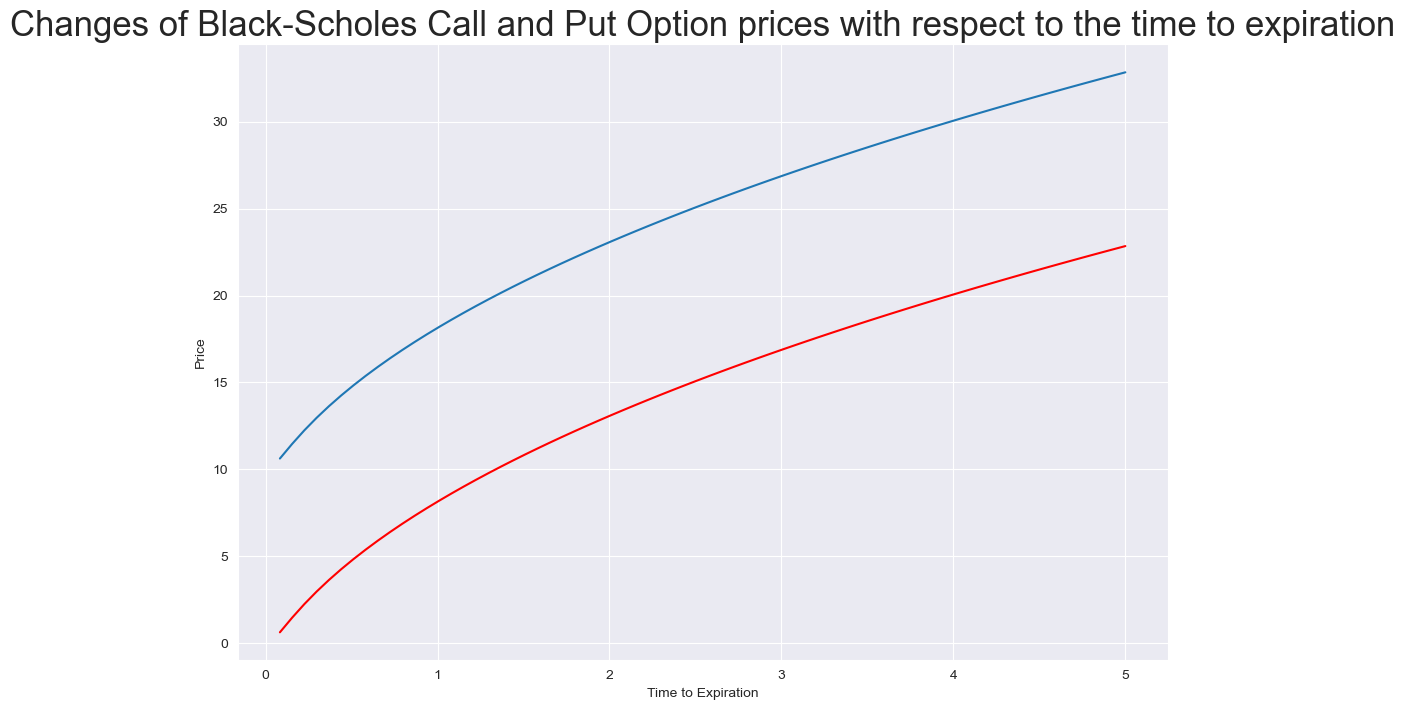

In [6]:
plt.figure(figsize = (12,8))
plt.title('Changes of Black-Scholes Call and Put Option prices with respect to the time to expiration', size = 25)
plt.plot(times, put_prices_time)
plt.plot(times, call_prices_time, color = "red")
plt.xlabel('Time to Expiration')
plt.ylabel('Price')
plt.show()

Again, looking at the Call-Put realtion we can see that this is something to be expected:

$$C_0 - P_0 = S -Ke^{-rt}.$$

They differ only by a constant and exponent of something negative that goes to $0$ as $t$ goes to $\infty$.  So, they are basically shifted by a constant S. (In our case r = 0, so difference is actually a constant $S-K$)

As to the shape of the graph we can see that the function is monotone and increasing. This can be seen from the analysis of the Black-Sholes formula:

$$C_0 = S\Phi(d_1) - Ke^{-rt}\Phi(d_2).$$

The second term quickly becomes very small because $\Phi$ is bounded and then multiplied by the exponent of $-rt$ that goes to $0$ as $t$ increases. In fact, even when $r=0$ this term goes to zero, because $d_2 \approx -0.5\sigma \sqrt{t}$ and goes to $-\infty$ as $t$ goes to $\infty$, so $\Phi(d_2)$ goes to $0$.

The first term is increasing as $t$ increases (at least for big $t$) because $d_1 \approx 0.5 \sigma \sqrt{t}$. We can also see that $C_0$ has a limit $S$ as $t \to \infty$.

We don't see it on our graphs, but if we consider longer time scale, we will notice that it indeed looks like it has a limit $S$:

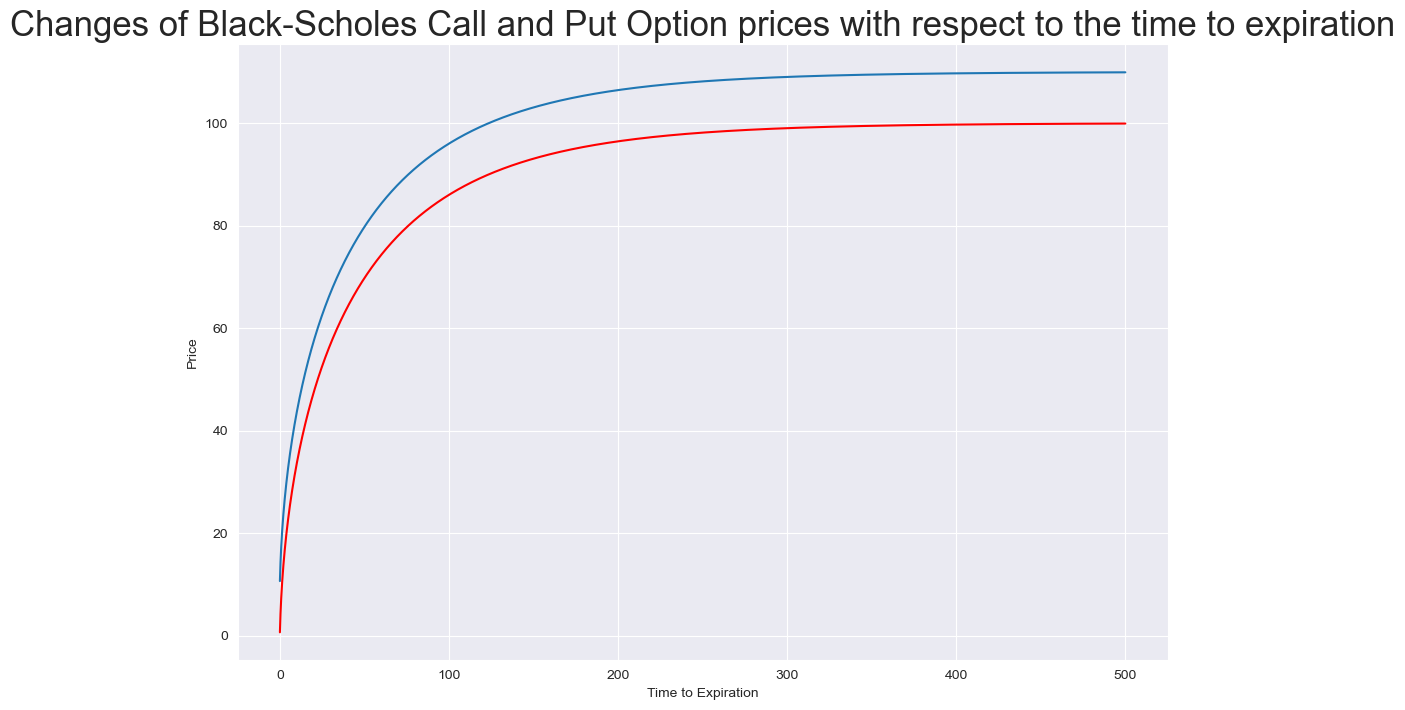

In [7]:
big_times = np.linspace(1/12, 500, 7000)
put_prices_big_time = [bs_put(S0,K,sigma, t = big_times[i]) for i in range(len(big_times))]
call_prices_big_time = [bs_call(S0,K,sigma, t = big_times[i]) for i in range(len(big_times))]
plt.figure(figsize = (12,8))
plt.title('Changes of Black-Scholes Call and Put Option prices with respect to the time to expiration', size = 25)
plt.plot(big_times, put_prices_big_time)
plt.plot(big_times, call_prices_big_time, color = "red")
plt.xlabel('Time to Expiration')
plt.ylabel('Price')
plt.show()